In [58]:
import pandas as pd

In [59]:
data = pd.read_json('data/dados_hospedagem.json')
data

,info_moveis
0,"{'avaliacao_geral': '10.0', 'experiencia_local..."
1,"{'avaliacao_geral': '10.0', 'experiencia_local..."
2,"{'avaliacao_geral': '10.0', 'experiencia_local..."
3,"{'avaliacao_geral': '10.0', 'experiencia_local..."
4,"{'avaliacao_geral': '10.0', 'experiencia_local..."
...,...
65,"{'avaliacao_geral': 'nan', 'experiencia_local'..."
66,"{'avaliacao_geral': 'nan', 'experiencia_local'..."
67,"{'avaliacao_geral': 'nan', 'experiencia_local'..."
68,"{'avaliacao_geral': 'nan', 'experiencia_local'..."


# 1. Handle

In [60]:
data = pd.json_normalize(data['info_moveis'])
data.head()

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,[This clean and comfortable one bedroom sits r...,[Lower Queen Anne is near the Seattle Center (...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Real Bed, Futon, Futon, Pull-out Sofa, Real B...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$0, $0, $0, $0, $0, $350.00, $350.00, $350.00...","[$0, $0, $0, $20.00, $15.00, $28.00, $35.00, $...","[$110.00, $45.00, $55.00, $52.00, $85.00, $50...."
1,10.0,--,10,[Welcome to the heart of the 'Ballard Brewery ...,"[--, Capital Hill is the heart of Seattle, bor...","[2, 3, 2, 3, 3, 3, 2, 1, 2, 2, 2]","[3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3]","[5, 6, 8, 3, 3, 5, 4, 5, 6, 7, 4]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$500.00, $300.00, $0, $300.00, $300.00, $360....","[$125.00, $100.00, $85.00, $110.00, $110.00, $...","[$350.00, $300.00, $425.00, $300.00, $285.00, ..."
2,10.0,--,11,[New modern house built in 2013. Spectacular ...,[Upper Queen Anne is a charming neighborhood f...,[4],[5],[7],[Real Bed],"[{TV,""Cable TV"",Internet,""Wireless Internet"",""...","[$1,000.00]",[$300.00],[$975.00]
3,10.0,--,12,[Our NW style home is 3200+ sq ft with 3 level...,[The Views from our top floor! Wallingford ha...,"[3, 3, 3, 3, 3, 3, 3, 3]","[6, 6, 5, 5, 5, 5, 4, 4]","[6, 6, 7, 8, 7, 7, 6, 6]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$500.00, $500.00, $500.00, $500.00, $500.00, ...","[$225.00, $300.00, $250.00, $250.00, $250.00, ...","[$490.00, $550.00, $350.00, $350.00, $350.00, ..."
4,10.0,--,14,"[Perfect for groups. 2 bedrooms, full bathroom...",[Safeway grocery store within walking distance...,"[2, 3]","[2, 6]","[3, 9]","[Real Bed, Real Bed]","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$300.00, $2,000.00]","[$40.00, $150.00]","[$200.00, $545.00]"


In [61]:
data_columns = list(data.columns)
data_columns[3:]

['descricao_local',
 'descricao_vizinhanca',
 'quantidade_banheiros',
 'quantidade_quartos',
 'quantidade_camas',
 'modelo_cama',
 'comodidades',
 'taxa_deposito',
 'taxa_limpeza',
 'preco']

In [62]:
data_columns[3:]

['descricao_local',
 'descricao_vizinhanca',
 'quantidade_banheiros',
 'quantidade_quartos',
 'quantidade_camas',
 'modelo_cama',
 'comodidades',
 'taxa_deposito',
 'taxa_limpeza',
 'preco']

In [63]:
data = data.explode(data_columns[3:])
data.head()

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
0,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
0,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
0,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
0,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00


In [64]:
data.reset_index(drop= True, inplace= True)
data

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,nan,--,8,Beautiful craftsman home in the historic Wedgw...,--,3,4,5,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",$178.00,$299.00
3814,nan,--,8,Located in a very easily accessible area of Se...,"Quiet, dead end street near I-5. The proximity...",2,4,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$0,$99.00,$199.00
3815,nan,--,8,This home is fully furnished and available wee...,--,1,3,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$0,$0,$400.00
3816,nan,--,9,This business-themed modern home features: *H...,Your hosts made Madison Valley their home when...,2,3,6,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",$150.00,$250.00


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   avaliacao_geral       3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   object
 3   descricao_local       3818 non-null   object
 4   descricao_vizinhanca  3818 non-null   object
 5   quantidade_banheiros  3818 non-null   object
 6   quantidade_quartos    3818 non-null   object
 7   quantidade_camas      3818 non-null   object
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  taxa_deposito         3818 non-null   object
 11  taxa_limpeza          3818 non-null   object
 12  preco                 3818 non-null   object
dtypes: object(13)
memory usage: 387.9+ KB


## 1.1 Convert columns to right type

In [66]:
data.sample(5)

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
1529,10.0,--,5,Our bright and spacious home is a cozy oasis i...,An eclectic residential neighborhood with rest...,1,3,3,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$95.00,$150.00,$189.00
1831,7.0,--,6,This is a great 2 bed room shared unit with it...,--,1,1,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$100.00,$65.00,$169.00
2878,9.0,--,4,Surrounded by views on one side and a garden o...,--,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$150.00,$0,$80.00
2527,9.0,--,2,We are renting out a private room in Capitol H...,We are located in a residential neighborhood n...,1,1,1,Airbed,"{TV,""Wireless Internet"",""Free Parking on Premi...",$0,$0,$40.00
732,10.0,--,2,This is a modern fully-furnished studio apartm...,"Close to downtown, Capitol Hill is one of Seat...",1,0,1,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$95.00,$25.00,$69.00


In [67]:
data = data.astype({'max_hospedes': 'int64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   avaliacao_geral       3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   int64 
 3   descricao_local       3818 non-null   object
 4   descricao_vizinhanca  3818 non-null   object
 5   quantidade_banheiros  3818 non-null   object
 6   quantidade_quartos    3818 non-null   object
 7   quantidade_camas      3818 non-null   object
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  taxa_deposito         3818 non-null   object
 11  taxa_limpeza          3818 non-null   object
 12  preco                 3818 non-null   object
dtypes: int64(1), object(12)
memory usage: 387.9+ KB


In [68]:
data[data_columns[5:8]] = data[data_columns[5:8]].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   avaliacao_geral       3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   int64 
 3   descricao_local       3818 non-null   object
 4   descricao_vizinhanca  3818 non-null   object
 5   quantidade_banheiros  3818 non-null   int64 
 6   quantidade_quartos    3818 non-null   int64 
 7   quantidade_camas      3818 non-null   int64 
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  taxa_deposito         3818 non-null   object
 11  taxa_limpeza          3818 non-null   object
 12  preco                 3818 non-null   object
dtypes: int64(4), object(9)
memory usage: 387.9+ KB


In [69]:
data = data.astype({'avaliacao_geral': 'float64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avaliacao_geral       3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descricao_local       3818 non-null   object 
 4   descricao_vizinhanca  3818 non-null   object 
 5   quantidade_banheiros  3818 non-null   int64  
 6   quantidade_quartos    3818 non-null   int64  
 7   quantidade_camas      3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  taxa_deposito         3818 non-null   object 
 11  taxa_limpeza          3818 non-null   object 
 12  preco                 3818 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 387.9+ KB


In [70]:
data['preco'] = data['preco'].apply(lambda cell: cell.replace('$', '').replace(',', '').strip())
data

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,110.00
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,45.00
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,55.00
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,52.00
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,85.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,NaN,--,8,Beautiful craftsman home in the historic Wedgw...,--,3,4,5,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",$178.00,299.00
3814,NaN,--,8,Located in a very easily accessible area of Se...,"Quiet, dead end street near I-5. The proximity...",2,4,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$0,$99.00,199.00
3815,NaN,--,8,This home is fully furnished and available wee...,--,1,3,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$0,$0,400.00
3816,NaN,--,9,This business-themed modern home features: *H...,Your hosts made Madison Valley their home when...,2,3,6,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",$150.00,250.00


In [71]:
data = data.astype({'preco': 'float64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avaliacao_geral       3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descricao_local       3818 non-null   object 
 4   descricao_vizinhanca  3818 non-null   object 
 5   quantidade_banheiros  3818 non-null   int64  
 6   quantidade_quartos    3818 non-null   int64  
 7   quantidade_camas      3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  taxa_deposito         3818 non-null   object 
 11  taxa_limpeza          3818 non-null   object 
 12  preco                 3818 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 387.9+ KB


In [72]:
data_replace_columns = ['taxa_deposito', 'taxa_limpeza']
data[data_replace_columns] = data[data_replace_columns].applymap(lambda cell: cell.replace('$', '').replace(',', '')).astype('float64')

C:\Users\mhenr\AppData\Local\Temp\ipykernel_2872\3339163728.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[data_replace_columns] = data[data_replace_columns].applymap(lambda cell: cell.replace('$', '').replace(',', '')).astype('float64')


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avaliacao_geral       3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descricao_local       3818 non-null   object 
 4   descricao_vizinhanca  3818 non-null   object 
 5   quantidade_banheiros  3818 non-null   int64  
 6   quantidade_quartos    3818 non-null   int64  
 7   quantidade_camas      3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  taxa_deposito         3818 non-null   float64
 11  taxa_limpeza          3818 non-null   float64
 12  preco                 3818 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 387.9+ KB


In [74]:
data.sample(5)

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
821,10.0,--,2,Designer renovated basement apartment in a 192...,--,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",300.0,60.0,90.0
2978,9.0,--,5,"This is a 2 bedroom, 2 bathroom garden apartme...",--,2,2,2,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",150.0,80.0,259.0
1274,10.0,--,4,"A modern, clean and maintained 1 bedroom plus ...","This is the heart of Seattle, the cross-sectio...",1,1,3,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",200.0,50.0,188.0
818,10.0,--,2,Amazing water views from this private cottage ...,--,1,0,1,Real Bed,"{Internet,""Wireless Internet"",""Free Parking on...",150.0,35.0,75.0
2094,9.0,--,12,A beautiful sun-filled homes in an amazing Bal...,Ballard is a hip fun neighborhood with a great...,3,5,7,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1000.0,250.0,465.0


In [75]:
data['descricao_local'] = data['descricao_local'].str.lower()
data

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,this clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,0.0,110.0
1,10.0,--,1,our century old upper queen anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,45.0
2,10.0,--,1,cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,55.0
3,10.0,--,1,very lovely and cozy room for one. convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,20.0,52.0
4,10.0,--,1,the “studio at mibbett hollow' is in a beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",0.0,15.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,NaN,--,8,beautiful craftsman home in the historic wedgw...,--,3,4,5,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1000.0,178.0,299.0
3814,NaN,--,8,located in a very easily accessible area of se...,"Quiet, dead end street near I-5. The proximity...",2,4,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",0.0,99.0,199.0
3815,NaN,--,8,this home is fully furnished and available wee...,--,1,3,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0.0,0.0,400.0
3816,NaN,--,9,this business-themed modern home features: *h...,Your hosts made Madison Valley their home when...,2,3,6,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1000.0,150.0,250.0


In [76]:
data['descricao_local'] = data['descricao_local'].str.replace('[^a-zA-Z0-9\-\']', ' ', regex= True)
data['descricao_local']

<>:1: SyntaxWarning: invalid escape sequence '\-'
<>:1: SyntaxWarning: invalid escape sequence '\-'
C:\Users\mhenr\AppData\Local\Temp\ipykernel_2872\56610220.py:1: SyntaxWarning: invalid escape sequence '\-'
  data['descricao_local'] = data['descricao_local'].str.replace('[^a-zA-Z0-9\-\']', ' ', regex= True)


0       this clean and comfortable one bedroom sits ri...
1       our century old upper queen anne house is loca...
2       cozy room in two-bedroom apartment along the l...
3       very lovely and cozy room for one  convenientl...
4       the  studio at mibbett hollow' is in a beautif...
                              ...                        
3813    beautiful craftsman home in the historic wedgw...
3814    located in a very easily accessible area of se...
3815    this home is fully furnished and available wee...
3816    this business-themed modern home features    h...
3817    this welcoming home is in the quiet residentia...
Name: descricao_local, Length: 3818, dtype: object

In [77]:
data['descricao_local'] = data['descricao_local'].str.replace('(?<!\w)-(?<!\w)', ' ', regex= True)
data['descricao_local']

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\mhenr\AppData\Local\Temp\ipykernel_2872\1510883037.py:1: SyntaxWarning: invalid escape sequence '\w'
  data['descricao_local'] = data['descricao_local'].str.replace('(?<!\w)-(?<!\w)', ' ', regex= True)


0       this clean and comfortable one bedroom sits ri...
1       our century old upper queen anne house is loca...
2       cozy room in two-bedroom apartment along the l...
3       very lovely and cozy room for one  convenientl...
4       the  studio at mibbett hollow' is in a beautif...
                              ...                        
3813    beautiful craftsman home in the historic wedgw...
3814    located in a very easily accessible area of se...
3815    this home is fully furnished and available wee...
3816    this business-themed modern home features    h...
3817    this welcoming home is in the quiet residentia...
Name: descricao_local, Length: 3818, dtype: object

In [78]:
data['descricao_local'] = data['descricao_local'].str.split()
data['descricao_local']

0       [this, clean, and, comfortable, one, bedroom, ...
1       [our, century, old, upper, queen, anne, house,...
2       [cozy, room, in, two-bedroom, apartment, along...
3       [very, lovely, and, cozy, room, for, one, conv...
4       [the, studio, at, mibbett, hollow', is, in, a,...
                              ...                        
3813    [beautiful, craftsman, home, in, the, historic...
3814    [located, in, a, very, easily, accessible, are...
3815    [this, home, is, fully, furnished, and, availa...
3816    [this, business-themed, modern, home, features...
3817    [this, welcoming, home, is, in, the, quiet, re...
Name: descricao_local, Length: 3818, dtype: object

In [79]:
data['comodidades'] = data['comodidades'].str.replace('\{|}|\"', '', regex= True)
data

<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
C:\Users\mhenr\AppData\Local\Temp\ipykernel_2872\844061120.py:1: SyntaxWarning: invalid escape sequence '\{'
  data['comodidades'] = data['comodidades'].str.replace('\{|}|\"', '', regex= True)


,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,"[this, clean, and, comfortable, one, bedroom, ...",Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"Internet,Wireless Internet,Kitchen,Free Parkin...",0.0,0.0,110.0
1,10.0,--,1,"[our, century, old, upper, queen, anne, house,...","Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"TV,Internet,Wireless Internet,Kitchen,Free Par...",0.0,0.0,45.0
2,10.0,--,1,"[cozy, room, in, two-bedroom, apartment, along...",The convenience of being in Seattle but on the...,1,1,1,Futon,"TV,Internet,Wireless Internet,Kitchen,Free Par...",0.0,0.0,55.0
3,10.0,--,1,"[very, lovely, and, cozy, room, for, one, conv...","Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"Internet,Wireless Internet,Kitchen,Free Parkin...",0.0,20.0,52.0
4,10.0,--,1,"[the, studio, at, mibbett, hollow', is, in, a,...",--,1,1,1,Real Bed,"Wireless Internet,Kitchen,Free Parking on Prem...",0.0,15.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,NaN,--,8,"[beautiful, craftsman, home, in, the, historic...",--,3,4,5,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",1000.0,178.0,299.0
3814,NaN,--,8,"[located, in, a, very, easily, accessible, are...","Quiet, dead end street near I-5. The proximity...",2,4,4,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",0.0,99.0,199.0
3815,NaN,--,8,"[this, home, is, fully, furnished, and, availa...",--,1,3,4,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",0.0,0.0,400.0
3816,NaN,--,9,"[this, business-themed, modern, home, features...",Your hosts made Madison Valley their home when...,2,3,6,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",1000.0,150.0,250.0


In [80]:
data['comodidades'] = data['comodidades'].str.split(',')
data

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,"[this, clean, and, comfortable, one, bedroom, ...",Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"[Internet, Wireless Internet, Kitchen, Free Pa...",0.0,0.0,110.0
1,10.0,--,1,"[our, century, old, upper, queen, anne, house,...","Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"[TV, Internet, Wireless Internet, Kitchen, Fre...",0.0,0.0,45.0
2,10.0,--,1,"[cozy, room, in, two-bedroom, apartment, along...",The convenience of being in Seattle but on the...,1,1,1,Futon,"[TV, Internet, Wireless Internet, Kitchen, Fre...",0.0,0.0,55.0
3,10.0,--,1,"[very, lovely, and, cozy, room, for, one, conv...","Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"[Internet, Wireless Internet, Kitchen, Free Pa...",0.0,20.0,52.0
4,10.0,--,1,"[the, studio, at, mibbett, hollow', is, in, a,...",--,1,1,1,Real Bed,"[Wireless Internet, Kitchen, Free Parking on P...",0.0,15.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,NaN,--,8,"[beautiful, craftsman, home, in, the, historic...",--,3,4,5,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ai...",1000.0,178.0,299.0
3814,NaN,--,8,"[located, in, a, very, easily, accessible, are...","Quiet, dead end street near I-5. The proximity...",2,4,4,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ki...",0.0,99.0,199.0
3815,NaN,--,8,"[this, home, is, fully, furnished, and, availa...",--,1,3,4,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ai...",0.0,0.0,400.0
3816,NaN,--,9,"[this, business-themed, modern, home, features...",Your hosts made Madison Valley their home when...,2,3,6,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ai...",1000.0,150.0,250.0


In [81]:
data['comodidades'][0]

['Internet',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Pets Allowed',
 'Elevator in Building',
 'Heating',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'Essentials',
 'Shampoo']

In [82]:
data['descricao_vizinhanca'] = data['descricao_vizinhanca'].str.lower().replace('[^a-zA-Z0-9\-\']', ' ', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\-'
<>:1: SyntaxWarning: invalid escape sequence '\-'
C:\Users\mhenr\AppData\Local\Temp\ipykernel_2872\2292167371.py:1: SyntaxWarning: invalid escape sequence '\-'
  data['descricao_vizinhanca'] = data['descricao_vizinhanca'].str.lower().replace('[^a-zA-Z0-9\-\']', ' ', regex=True)


In [83]:
data['descricao_vizinhanca'] = data['descricao_vizinhanca'].str.replace('(?<!\w)-(?<!\w)', '', regex= True)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\mhenr\AppData\Local\Temp\ipykernel_2872\1564227091.py:1: SyntaxWarning: invalid escape sequence '\w'
  data['descricao_vizinhanca'] = data['descricao_vizinhanca'].str.replace('(?<!\w)-(?<!\w)', '', regex= True)


In [84]:
data['descricao_vizinhanca'] = data['descricao_vizinhanca'].str.split()
data

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,"[this, clean, and, comfortable, one, bedroom, ...","[lower, queen, anne, is, near, the, seattle, c...",1,1,1,Real Bed,"[Internet, Wireless Internet, Kitchen, Free Pa...",0.0,0.0,110.0
1,10.0,--,1,"[our, century, old, upper, queen, anne, house,...","[upper, queen, anne, is, a, really, pleasant, ...",1,1,1,Futon,"[TV, Internet, Wireless Internet, Kitchen, Fre...",0.0,0.0,45.0
2,10.0,--,1,"[cozy, room, in, two-bedroom, apartment, along...","[the, convenience, of, being, in, seattle, but...",1,1,1,Futon,"[TV, Internet, Wireless Internet, Kitchen, Fre...",0.0,0.0,55.0
3,10.0,--,1,"[very, lovely, and, cozy, room, for, one, conv...","[ballard, is, lovely, vibrant, and, one, of, t...",1,1,1,Pull-out Sofa,"[Internet, Wireless Internet, Kitchen, Free Pa...",0.0,20.0,52.0
4,10.0,--,1,"[the, studio, at, mibbett, hollow', is, in, a,...",[],1,1,1,Real Bed,"[Wireless Internet, Kitchen, Free Parking on P...",0.0,15.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,NaN,--,8,"[beautiful, craftsman, home, in, the, historic...",[],3,4,5,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ai...",1000.0,178.0,299.0
3814,NaN,--,8,"[located, in, a, very, easily, accessible, are...","[quiet, dead, end, street, near, i-5, the, pro...",2,4,4,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ki...",0.0,99.0,199.0
3815,NaN,--,8,"[this, home, is, fully, furnished, and, availa...",[],1,3,4,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ai...",0.0,0.0,400.0
3816,NaN,--,9,"[this, business-themed, modern, home, features...","[your, hosts, made, madison, valley, their, ho...",2,3,6,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ai...",1000.0,150.0,250.0


In [85]:
data['descricao_vizinhanca']

0       [lower, queen, anne, is, near, the, seattle, c...
1       [upper, queen, anne, is, a, really, pleasant, ...
2       [the, convenience, of, being, in, seattle, but...
3       [ballard, is, lovely, vibrant, and, one, of, t...
4                                                      []
                              ...                        
3813                                                   []
3814    [quiet, dead, end, street, near, i-5, the, pro...
3815                                                   []
3816    [your, hosts, made, madison, valley, their, ho...
3817    [despite, the, quiet, leafy, streets, of, this...
Name: descricao_vizinhanca, Length: 3818, dtype: object

In [86]:
data_moveis = pd.read_json('data/moveis_disponiveis.json')
data_moveis

,id,data,vaga_disponivel,preco
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None
2,857,2016-01-06,False,None
3,857,2016-01-07,False,None
4,857,2016-01-08,False,None
...,...,...,...,...
364995,3279,2016-12-29,True,$140.00
364996,3279,2016-12-30,True,$140.00
364997,3279,2016-12-31,True,$140.00
364998,3279,2017-01-01,True,$140.00


In [87]:
data_moveis.head(10)

,id,data,vaga_disponivel,preco
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None
2,857,2016-01-06,False,None
3,857,2016-01-07,False,None
4,857,2016-01-08,False,None
5,857,2016-01-09,False,None
6,857,2016-01-10,False,None
7,857,2016-01-11,False,None
8,857,2016-01-12,False,None
9,857,2016-01-13,False,None


In [88]:
data_moveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               365000 non-null  int64 
 1   data             365000 non-null  object
 2   vaga_disponivel  365000 non-null  bool  
 3   preco            270547 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 11.5+ MB


In [89]:
data_moveis['data'] = pd.to_datetime(data_moveis['data'])

In [90]:
data_moveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               365000 non-null  int64         
 1   data             365000 non-null  datetime64[ns]
 2   vaga_disponivel  365000 non-null  bool          
 3   preco            270547 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 11.5+ MB


In [91]:
data_moveis.head(20)

,id,data,vaga_disponivel,preco
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None
2,857,2016-01-06,False,None
3,857,2016-01-07,False,None
4,857,2016-01-08,False,None
5,857,2016-01-09,False,None
6,857,2016-01-10,False,None
7,857,2016-01-11,False,None
8,857,2016-01-12,False,None
9,857,2016-01-13,False,None


In [92]:
data_moveis_selection = data_moveis['data'].dt.strftime('%Y-%m')
data_moveis_selection

0         2016-01
1         2016-01
2         2016-01
3         2016-01
4         2016-01
           ...   
364995    2016-12
364996    2016-12
364997    2016-12
364998    2017-01
364999    2017-01
Name: data, Length: 365000, dtype: object

In [93]:
subset = data_moveis.groupby(data_moveis_selection)['vaga_disponivel'].sum()

<Axes: ylabel='data'>

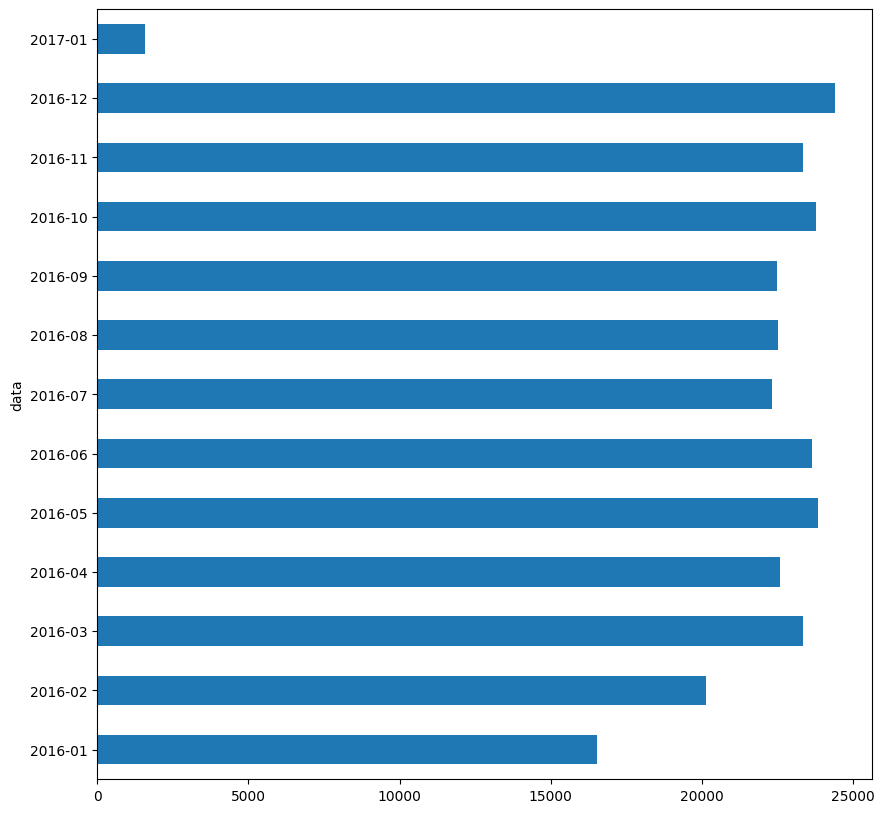

In [94]:
subset.plot(kind= 'barh', figsize= (10,10))

In [95]:
data_moveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               365000 non-null  int64         
 1   data             365000 non-null  datetime64[ns]
 2   vaga_disponivel  365000 non-null  bool          
 3   preco            270547 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 11.5+ MB


In [96]:
data_moveis['preco'].fillna('0.0', inplace= True)

In [97]:
data_moveis['preco'] = data_moveis['preco'].apply(lambda cell: cell.replace('$', '').replace(',', '')).astype('float64')
data_moveis

,id,data,vaga_disponivel,preco
0,857,2016-01-04,False,0.0
1,857,2016-01-05,False,0.0
2,857,2016-01-06,False,0.0
3,857,2016-01-07,False,0.0
4,857,2016-01-08,False,0.0
...,...,...,...,...
364995,3279,2016-12-29,True,140.0
364996,3279,2016-12-30,True,140.0
364997,3279,2016-12-31,True,140.0
364998,3279,2017-01-01,True,140.0


In [98]:
data_moveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               365000 non-null  int64         
 1   data             365000 non-null  datetime64[ns]
 2   vaga_disponivel  365000 non-null  bool          
 3   preco            365000 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 11.5 MB
